In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer(as_frame = True)

X = data.data
y = data.target

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state = 42)

In [7]:
def train_and_plot(X_train, y_train, X_test, y_test, penalty ="12"):
    print(f"Penalty {penalty}")
    if penalty=='elasticnet':
        model = LogisticRegression(solver='saga', penalty=penalty, l1_ratio=0.7)
    else:
        model = LogisticRegression(solver='saga', penalty=penalty)
    pipe = Pipeline([
        ('scaler', StandardScaler()), 
        ('lr', model)])
    
    pipe.fit(X_train, y_train)
    print(pipe.score(X_test, y_test))
    importance = model.coef_[0]

    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.show()

Penalty none
0.9840425531914894


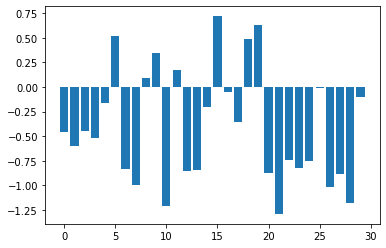

Penalty l2
0.9840425531914894


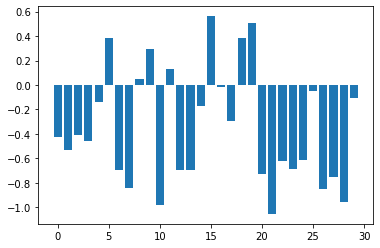

Penalty l1
0.9840425531914894


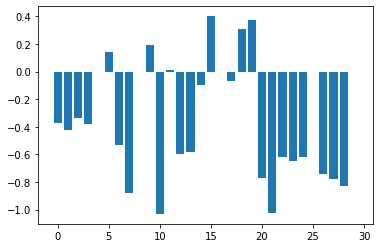

In [8]:
train_and_plot(X_train, y_train, X_test, y_test, "none")
train_and_plot(X_train, y_train, X_test, y_test, "l2")
train_and_plot(X_train, y_train, X_test, y_test, "l1")

In [9]:
X_train_outlier = X_train.append(X_train.iloc[172]*10,  ignore_index=True)
y_train_outlier = y_train.append(pd.Series([1]), ignore_index=True)

Penalty none
0.9095744680851063


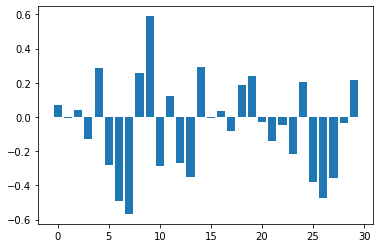

Penalty l2
0.9095744680851063


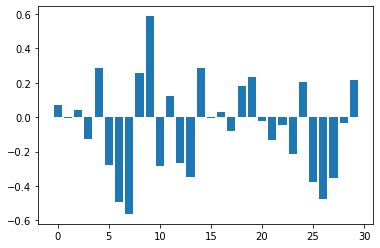

Penalty l1
0.9148936170212766


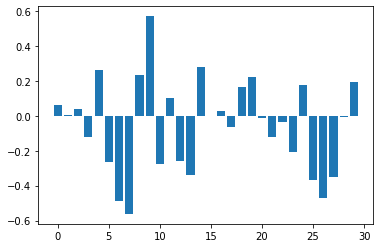

In [10]:
train_and_plot(X_train_outlier, y_train_outlier, X_test, y_test, "none")
train_and_plot(X_train_outlier, y_train_outlier, X_test, y_test, "l2")
train_and_plot(X_train_outlier, y_train_outlier, X_test, y_test, "l1")

In [ ]:
#report
print(classification_report(y_test, y_pred))